# **Exploratory Data Analysis (EDA) on Text Data (Amazon Product Review - Case Study)**

## **Basic Text Data Pre-processing**

In [1]:
# Importing necessary libraries

# For data-loading & linear-algebra
import numpy as np
import pandas as pd
# from pandas.parser import CParserError

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For performing mathematical operations
import math

In [2]:
# Importing the dataset
product_review_df = pd.read_csv('Amazon_Product_Review.csv', error_bad_lines = False)

/Applications/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Checking sample data in the dataset
product_review_df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
# Checking the shape of the dataset
print('Shape of the dataset: ', product_review_df.shape)

Shape of the dataset:  (34660, 21)


In [5]:
# Checking the names of the columns
product_review_df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

This means the dataset has **34660** rows and **21** columns.

However, we only need information such as **product name**, **review text**, **user recommendation (binary)**, and the **number of people that found a review helpful**. 

Therefore, the other columns need to be dropped, and thus reducing the dataset to only four columns, i.e., `name`, `reviews.text`, `reviews.doRecommend`, and `reviews.numHelpful`:

In [6]:
# Selecting the aforesaid columns
product_review_df = product_review_df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of dataset: ",product_review_df.shape)
product_review_df.head()

Shape of dataset:  (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


Now, we need to check out if there are any **NULL values** in the dataset.

In [7]:
# Checking for NULL values
product_review_df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [8]:
# Dropping NULL values
product_review_df.dropna(inplace = True)
product_review_df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [9]:
# Checking the sample dataset again
product_review_df.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [10]:
# Filtering out dataset where products have more than 500 reviews, and there are 8 such unique products
product_review_df = product_review_df.groupby('name').filter(lambda x: len(x) > 500).reset_index(drop = True)
print('Number of products: ', len(product_review_df['name'].unique()))

Number of products:  8


In [11]:
# Checking the dataset shape
product_review_df.shape

(26068, 4)

In [12]:
# Checking the names of 8 unique products
product_review_df['name'].value_counts()

Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                                                           10962
Echo (White),,,\r\nEcho (White),,,                                                                                                                3300
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,                                         3176
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                                                           2814
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                            2527
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                                                           1679
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,                     

In [13]:
# Changing the column data type
product_review_df['reviews.doRecommend'] = product_review_df['reviews.doRecommend'].astype(int)
product_review_df['reviews.numHelpful'] = product_review_df['reviews.numHelpful'].astype(int)

In [14]:
# Checking the sample data after change
product_review_df.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0


## **Cleaning Text Data in Python**

In [15]:
product_review_df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [16]:
product_review_df['name'] = product_review_df['name'].apply(lambda x: x.split(',,,')[0])

In [17]:
product_review_df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

In [18]:
for index, text in enumerate(product_review_df['reviews.text'][30:40]):
  print('Review %d: \n' %(index + 1), text)

Review 1: 
 If your looking for a affordable gift this is it!.
Review 2: 
 This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.
Review 3: 
 Works great. Love the portability of books. Overall great product
Review 4: 
 I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.
Review 5: 
 Just the right size for reading books and playing some games.
Review 6: 
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 7: 
 Overall a nice product for traveling purposes Value for money
Review 8: 
 My children love this table great quality of pictures, excellent camera
Review 9: 
 I bought 3 tablets and my family was not disappointed.
Review 10: 
 Great tablet fast screen good size never gives me problem


## **Expand Contractions**

In [19]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [20]:
# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [21]:
# Function for expanding contractions
def expand_contractions(text, contractions_dict = contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [22]:
# Expanding Contractions in the reviews
product_review_df['reviews.text'] = product_review_df['reviews.text'].apply(lambda x: expand_contractions(x))

In [23]:
# Cheecking for contractions
for index, text in enumerate(product_review_df['reviews.text'][30:40]):
  print('Review %d: \n' %(index + 1), text)

Review 1: 
 If your looking for a affordable gift this is it!.
Review 2: 
 This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.
Review 3: 
 Works great. Love the portability of books. Overall great product
Review 4: 
 I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.
Review 5: 
 Just the right size for reading books and playing some games.
Review 6: 
 I love everything about this tablet! The imaging is sharp and clear. It is fast and light weight. Love it!
Review 7: 
 Overall a nice product for traveling purposes Value for money
Review 8: 
 My children love this table great quality of pictures, excellent camera
Review 9: 
 I bought 3 tablets and my family was not disappointed.
Review 10: 
 Great tablet fast screen good size never gives me problem


Here, the **expand_contractions** function uses *regular expressions to map the contractions in the text to their expanded forms from the dictionary*. 

Now that we have **expanded the contractions**, it is time to change the words to **lowercase**.

## **Chaning the reviews to Lowercase**

In [24]:
product_review_df['cleaned'] = product_review_df['reviews.text'].apply(lambda x: x.lower())

In [25]:
product_review_df[['reviews.text','cleaned']][30:40]

,reviews.text,cleaned
30,If your looking for a affordable gift this is ...,if your looking for a affordable gift this is ...
31,"This is a great tablet for the price, would re...","this is a great tablet for the price, would re..."
32,Works great. Love the portability of books. Ov...,works great. love the portability of books. ov...
33,I am still learning all the things I can do wi...,i am still learning all the things i can do wi...
34,Just the right size for reading books and play...,just the right size for reading books and play...
35,I love everything about this tablet! The imagi...,i love everything about this tablet! the imagi...
36,Overall a nice product for traveling purposes ...,overall a nice product for traveling purposes ...
37,My children love this table great quality of p...,my children love this table great quality of p...
38,I bought 3 tablets and my family was not disap...,i bought 3 tablets and my family was not disap...
39,Great tablet fast screen good size never gives...,great tablet fast screen good size never gives...


## **Remove digits and words containing digits**

In [26]:
product_review_df['cleaned'] = product_review_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*', '', x))

In [26]:
product_review_df[['reviews.text','cleaned']][36:40]

,reviews.text,cleaned
36,Overall a nice product for traveling purposes ...,overall a nice product for traveling purposes ...
37,My children love this table great quality of p...,my children love this table great quality of p...
38,I bought 3 tablets and my family was not disap...,i bought 3 tablets and my family was not disap...
39,Great tablet fast screen good size never gives...,great tablet fast screen good size never gives...


## **Remove Punctuations**

In [27]:
# Removing punctuations
product_review_df['cleaned'] = product_review_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [28]:
# Removing extra spaces
product_review_df['cleaned'] = product_review_df['cleaned'].apply(lambda x: re.sub(' +',' ', x))

In [29]:
# Cheecking the cleaned-data
for index, text in enumerate(product_review_df['cleaned'][30:40]):
  print('Cleaned Review %d: \n' %(index + 1), text)

Cleaned Review 1: 
 if your looking for a affordable gift this is it
Cleaned Review 2: 
 this is a great tablet for the price would recommend it to anyone looking for a basic tablet
Cleaned Review 3: 
 works great love the portability of books overall great product
Cleaned Review 4: 
 i am still learning all the things i can do with my new kindle fire it is so much better lighter in weight and easier to use than my old tablet
Cleaned Review 5: 
 just the right size for reading books and playing some games
Cleaned Review 6: 
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Cleaned Review 7: 
 overall a nice product for traveling purposes value for money
Cleaned Review 8: 
 my children love this table great quality of pictures excellent camera
Cleaned Review 9: 
 i bought 3 tablets and my family was not disappointed
Cleaned Review 10: 
 great tablet fast screen good size never gives me problem


## **Preparing Text Data for Exploratory Data Analysis (EDA)**

In [30]:
# Importing spacy
import spacy

In [31]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [32]:
# Lemmatization with stopwords removal
product_review_df['lemmatized'] = product_review_df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

In [33]:
for index, text in enumerate(product_review_df['lemmatized'][35:40]):
  print('Lemmatized Review %d: \n' %(index + 1), text)

Lemmatized Review 1: 
 love tablet imaging sharp clear fast light weight love
Lemmatized Review 2: 
 overall nice product travel purpose value money
Lemmatized Review 3: 
 child love table great quality picture excellent camera
Lemmatized Review 4: 
 buy 3 tablet family disappoint
Lemmatized Review 5: 
 great tablet fast screen good size give problem


In [34]:
product_review_df_grouped = product_review_df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
product_review_df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...
Echo (White),compete ipad high end android tablet easily ou...


In [35]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word')

data = cv.fit_transform(product_review_df_grouped['lemmatized'])
product_review_df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
product_review_df_dtm.index = product_review_df_grouped.index
product_review_df_dtm.head(2)

,01052016,01162017,062017,0ff,0ne,10,100,1000,10000,1000s,...,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zooming,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,1,0,0,0,39,25,1,1,0,...,4,0,1,0,0,0,0,0,0,0
Amazon Fire Tv,0,0,0,0,0,4,11,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
product_review_df_dtm.shape

(8, 12153)

## **Exploratory Data Analysis on Amazon Product Reviews**

In [38]:
# Importing wordcloud for plotting word clouds
from wordcloud import WordCloud

# Importing textwrap for wrapping longer text
from textwrap import wrap

In [39]:
# Function for generating word clouds for unique Amazon products
def generate_word_cloud(data, title):
  wc = WordCloud(width = 400, height = 300, max_words = 150, colormap = "Dark2").generate_from_frequencies(data)
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title, 60)), fontsize = 12)
  plt.show()

In [40]:
# Transposing document term matrix
product_review_df_dtm = product_review_df_dtm.transpose()

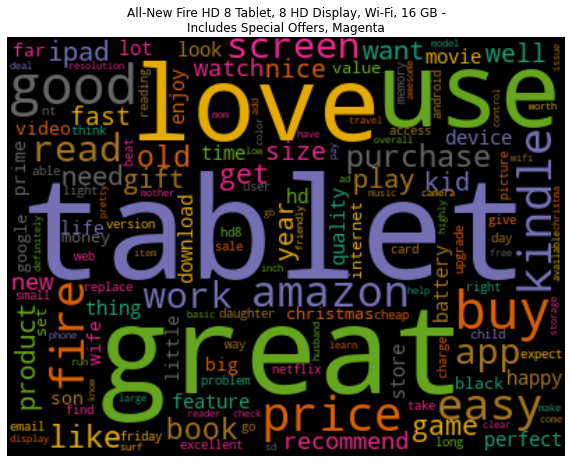

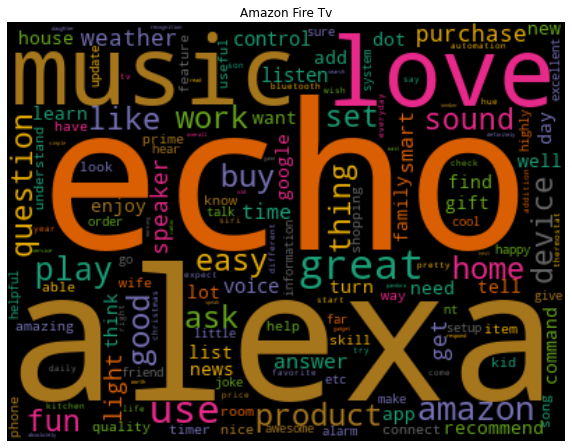

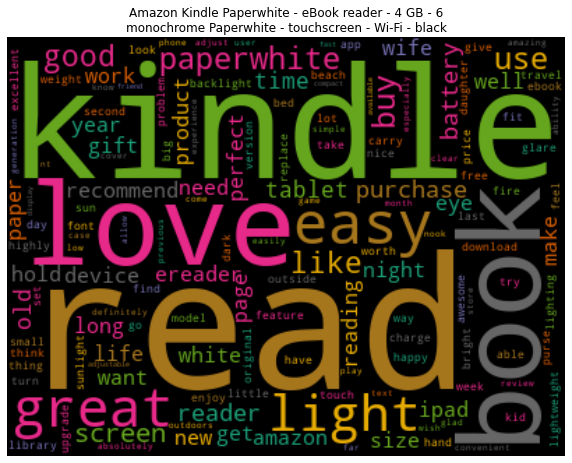

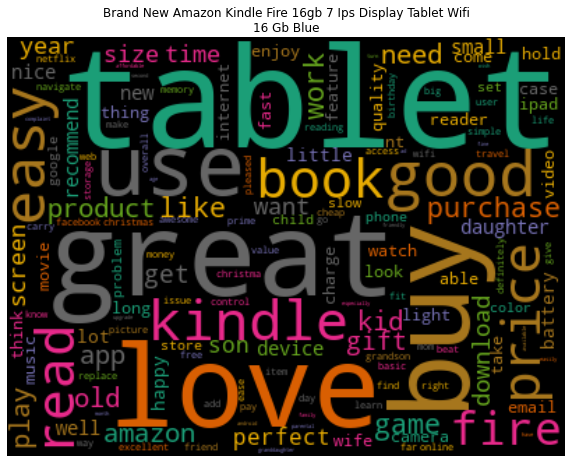

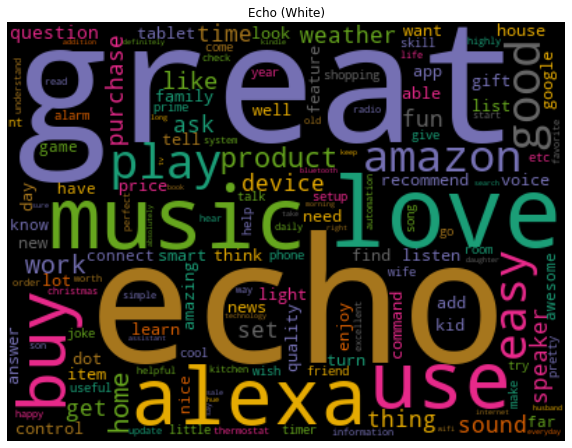

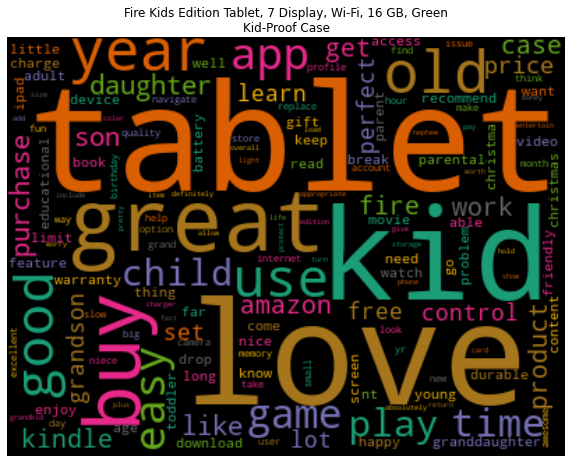

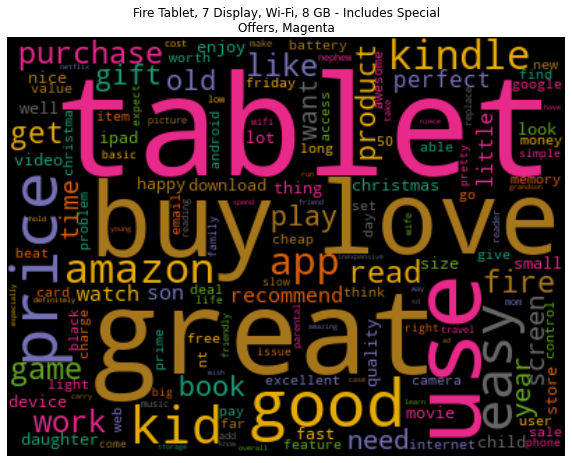

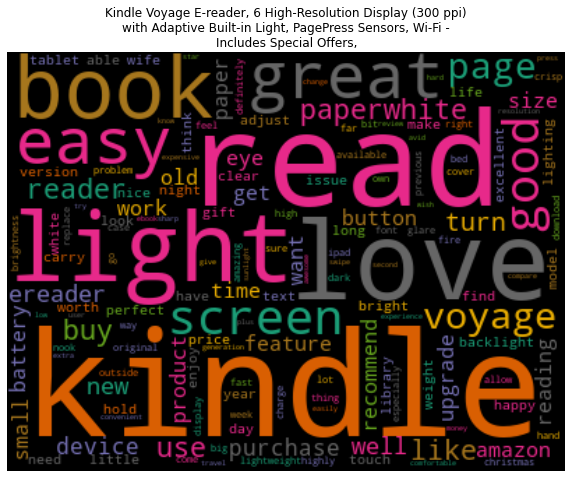

In [41]:
# Plotting word cloud for each product
for index, product in enumerate(product_review_df_dtm.columns):
  generate_word_cloud(product_review_df_dtm[product].sort_values(ascending = False), product)

In [42]:
from textblob import TextBlob
product_review_df['polarity'] = product_review_df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [43]:
print("3 Random Reviews with Highest Polarity:")
for index, review in enumerate(product_review_df.iloc[product_review_df['polarity'].sort_values(ascending = False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index + 1), review)

3 Random Reviews with Highest Polarity:
Review 1:
 The kindle fire hd is a wonderful tool as well as a device for entertainment. The beauty of the kindle fire is the price. I look forward to buying updated devices.
Review 2:
 The was an excellent Christmas gift for my son. It does everything he needs.
Review 3:
 This is just the perfect item for what we needed. It is compact and can go anywhere with you.


In [44]:
print("3 Random Reviews with Lowest Polarity:")
for index, review in enumerate(product_review_df.iloc[product_review_df['polarity'].sort_values(ascending = True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index + 1), review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 2:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it
Review 3:
 I got this for my mom who is 78. She hates it when football is on and she cant get the lottery numbers. Problem solved.


## **Product Reviews: Plotting**

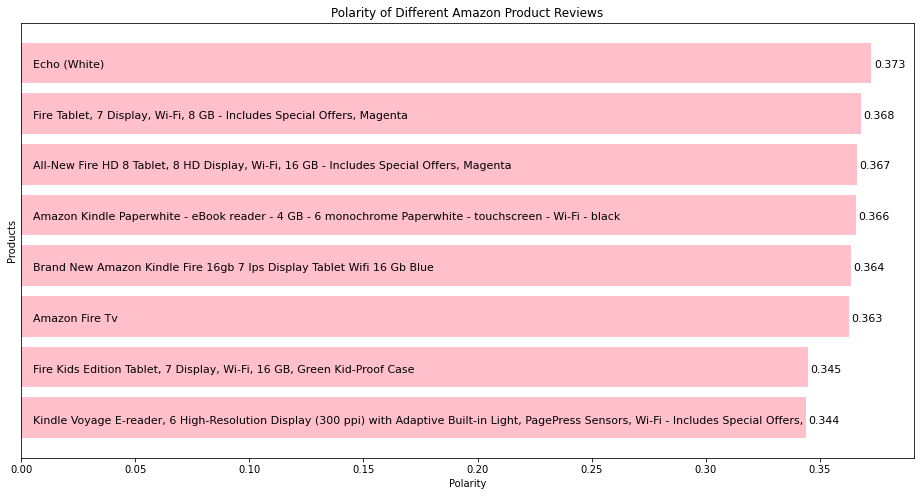

In [45]:
product_polarity_sorted = pd.DataFrame(product_review_df.groupby('name')['polarity'].mean().sort_values(ascending = True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph = plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color = 'pink',)

# Writing product names on bar
for bar, product in zip(polarity_graph, product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product), va='center',fontsize=11,color='black')

# Writing polarity values on graph
for bar, polarity in zip(polarity_graph, product_polarity_sorted['polarity']):
  plt.text(bar.get_width() + 0.001,bar.get_y() + bar.get_width(),'%.3f'%polarity,va = 'center',fontsize = 11,color = 'black')
  
plt.yticks([])
plt.show()

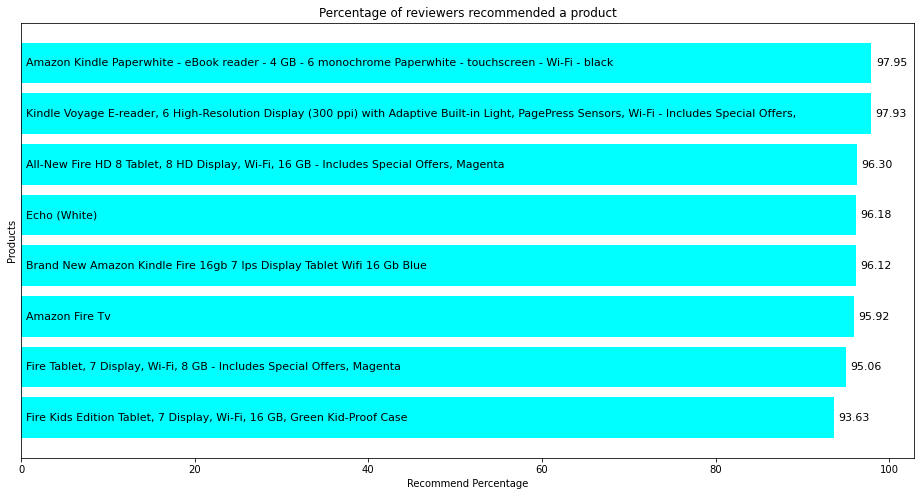

In [46]:
recommend_percentage = pd.DataFrame(((product_review_df.groupby('name')['reviews.doRecommend'].sum()*100)/product_review_df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending = True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph = plt.barh(np.arange(len(recommend_percentage.index)), recommend_percentage['reviews.doRecommend'],color = 'cyan')

# Writing product names on bar
for bar, product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y() + 0.4,'{}'.format(product),va = 'center',fontsize = 11,color = 'black')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize = 11,color = 'black')

plt.yticks([])
plt.show()

In [47]:
import textstat

In [48]:
product_review_df['dale_chall_score'] = product_review_df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))

In [49]:
product_review_df['flesh_reading_ease'] = product_review_df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))

In [50]:
product_review_df['gunning_fog'] = product_review_df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

In [51]:
print('Dale Chall Score of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

Dale Chall Score of upvoted reviews: 6.148739837398375
Dale Chall Score of not upvoted reviews: 5.6954779939403615


In [52]:
print('Flesch Reading Score of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

Flesch Reading Score of upvoted reviews: 81.98257113821138
Flesch Reading Score of not upvoted reviews: 84.85865810875458


In [53]:
print('Gunning Fog Index of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['gunning_fog'].mean())

Gunning Fog Index of upvoted reviews: 7.980264227642277
Gunning Fog Index of not upvoted reviews: 6.861778424493702


In [59]:
product_review_df['text_standard'] = product_review_df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',product_review_df[product_review_df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',product_review_df[product_review_df['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


In [60]:
product_review_df['reading_time'] = product_review_df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews: 3.4542174796747966
Reading Time of not upvoted reviews: 1.7917397544251314


In [61]:
product_review_df.head(3)

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,reading_time
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed my ch...,product far disappoint child love use like abi...,0.3,7.81,74.69,9.84,6th and 7th grade,1.72
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person bough...,great beginner experienced person buy gift love,0.7,6.24,81.29,8.51,3rd and 4th grade,0.91
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrill ...,0.0,1.25,92.12,6.74,3rd and 4th grade,1.56


## **Conclusion on the EDA from the Text Data**

**Additional References:**

1. Lambda Functions: https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/
2. Effective Text Data Cleaning: https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/
3. Regular Expressions: https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/
4. Extracting Information from Reports: https://www.analyticsvidhya.com/blog/2017/03/extracting-information-from-reports-using-regular-expressons-library-in-python/
5. 4 Applications of Regular Expreesions: https://www.analyticsvidhya.com/blog/2020/01/4-applications-of-regular-expressions-that-every-data-scientist-should-know-with-python-code/
5. Stopwords: https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/
6. SpaCy: https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/
7. Bag of Words Model & TF-IDF (Document Term Matrix): https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
8. Word clouds: https://amueller.github.io/word_cloud/index.html
9. Twitter Sentiment Analysis: https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
10. Python Graphs: https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/
11. Textstat: https://pypi.org/project/textstat/
11. Flesch–Kincaid readability tests: https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests